In [ ]:
# Use XML processing modules to obtain bounding box information from Annotations datasets and scikit images to perform image processing and feature extraction

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import glob
import cv2
import os 
from PIL import Image, ImageOps
from pathlib import Path
from PIL import Image
import xml.etree.ElementTree as ET 
from skimage import io, color, filters, feature
from skimage.feature import hog
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import PCA
import json
import matplotlib.pyplot as plt

In [3]:
data_mining = r'C:\Users\Narendra\Downloads\NDM\datamining_assignment'
Data_ann = r'C:\Users\Narendra\Downloads\NDM\New folder'

data_image = glob.glob(f"{data_mining}/*/*.jpg")
data_annotations = glob.glob(f"{Data_ann}/*/*.xml")
data_breed = glob.glob(f"{data_mining}/*")

print(f"Total images read: {len(data_image)}")
print(f"Total images read: {len(data_annotations)}")
print(f"Total images read: {len(data_breed)}")



Total images read: 690
Total images read: 689
Total images read: 4


In [ ]:
# Cropping and Resize Images In Your 4-class Images Dataset: Use the bounding box information in the Annotations dataset relevant to your Images Dataset and to crop the images in your dataset and resize each image to 128x128 pixel image.

In [4]:
def get_bounding_boxes(annot):
    try:
        tree = ET.parse(annot)
        root = tree.getroot()
        bbox = []
        for o in root.findall('object'):
            bndbox = o.find('bndbox')
            xmin = int(bndbox.find('xmin').text)
            ymin = int(bndbox.find('ymin').text)
            xmax = int(bndbox.find('xmax').text)
            ymax = int(bndbox.find('ymax').text)
            bbox.append((xmin, ymin, xmax, ymax))
        return bbox
    except ET.ParseError as e:
        print(f"Error parsing XML file: {e}")
        return []

In [5]:
def get_image(annot):
    annot_dir, annot_file = os.path.split(annot)
    image_file = annot_file.replace('.xml', '.jpg')
    image_path = os.path.join(annot_dir.replace('New folder', 'datamining_assignment'), image_file)
    return image_path

In [6]:
for i in range(len(data_annotations)):
    bbox = get_bounding_boxes(data_annotations[i])
    dog = get_image(data_annotations[i])
    try:
        im = Image.open(dog)
    except FileNotFoundError:
        print(f"Error: Image file '{dog}' not found.")
        continue
    for j in range(len(bbox)):
        im2 = im.crop(bbox[j])
        im2 = im2.resize((128, 128), resample=Image.Resampling.BICUBIC)
        new_path = dog.replace(data_mining, r'C:\Users\Narendra\Downloads\NDM\Cropped')
        new_path = new_path.replace('.jpg', f'-{j}.jpg')
        im2 = im2.convert('RGB')
        head, tail = os.path.split(new_path)
        Path(head).mkdir(parents=True, exist_ok=True)
        im2.save(new_path)

Error: Image file 'C:\Users\Narendra\Downloads\NDM\datamining_assignment\English_foxhound\n02089973_5560.jpg' not found.
Error: Image file 'C:\Users\Narendra\Downloads\NDM\datamining_assignment\German_short-haired_pointer\n02100236_3649.jpg.jpg' not found.
Error: Image file 'C:\Users\Narendra\Downloads\NDM\datamining_assignment\Japanese_spaniel\n02085782_4511.jpg.jpg' not found.
Error: Image file 'C:\Users\Narendra\Downloads\NDM\datamining_assignment\Norwegian_elkhound\n02091467_6962 (2).jpg' not found.
Error: Image file 'C:\Users\Narendra\Downloads\NDM\datamining_assignment\Norwegian_elkhound\n02091467_6962 (3).jpg' not found.
Error: Image file 'C:\Users\Narendra\Downloads\NDM\datamining_assignment\Norwegian_elkhound\n02091467_6962 (4).jpg' not found.
Error: Image file 'C:\Users\Narendra\Downloads\NDM\datamining_assignment\Norwegian_elkhound\n02091467_6962 (5).jpg' not found.
Error: Image file 'C:\Users\Narendra\Downloads\NDM\datamining_assignment\Norwegian_elkhound\n02091467_6962.jpg

In [7]:
cropped=glob.glob('C:/Users/Narendra/Downloads/NDM/cropped/*/*')

In [8]:
len(cropped),cropped[0]

(749,
 'C:/Users/Narendra/Downloads/NDM/cropped\\English_foxhound\\n02089973_1-0.jpg')

In [ ]:
# Choose one image and convert the color images to grayscale images, Plot images with corresponding edge histogram values(add x-axis label "Bins") and y-axis label "Pixel Count"

{'Norwegian_elkhound', 'Japanese_spaniel', 'German_short-haired_pointer', 'English_foxhound'}
C:/Users/Narendra/Downloads/NDM/cropped\Norwegian_elkhound\n02091467_1110-0.jpg


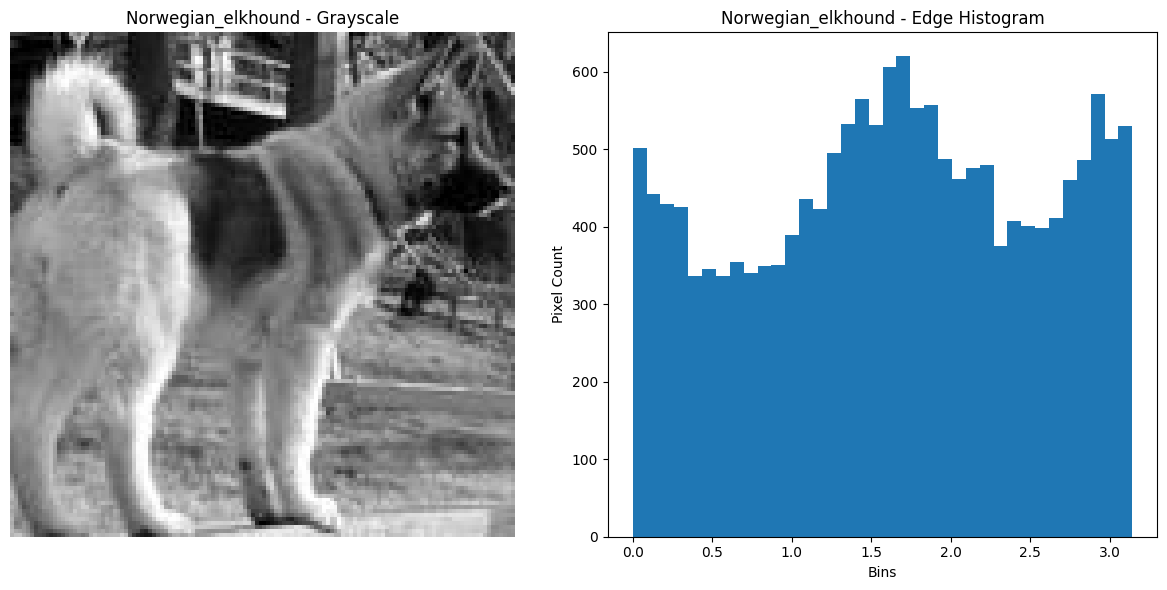

C:/Users/Narendra/Downloads/NDM/cropped\Japanese_spaniel\n02085782_1039-0.jpg


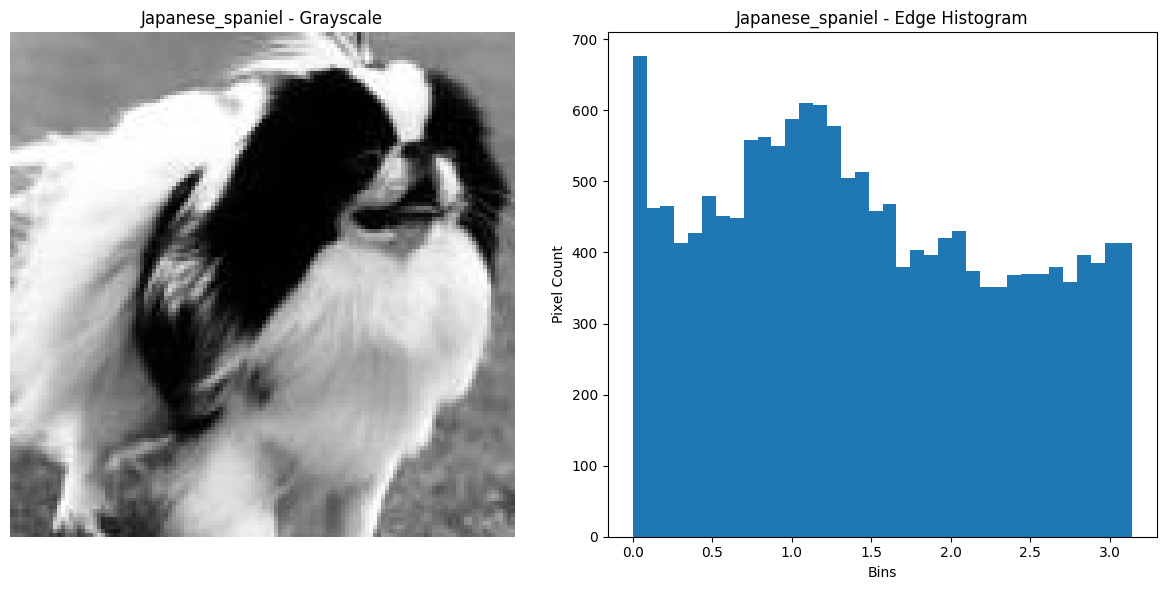

C:/Users/Narendra/Downloads/NDM/cropped\German_short-haired_pointer\n02100236_1054-0.jpg


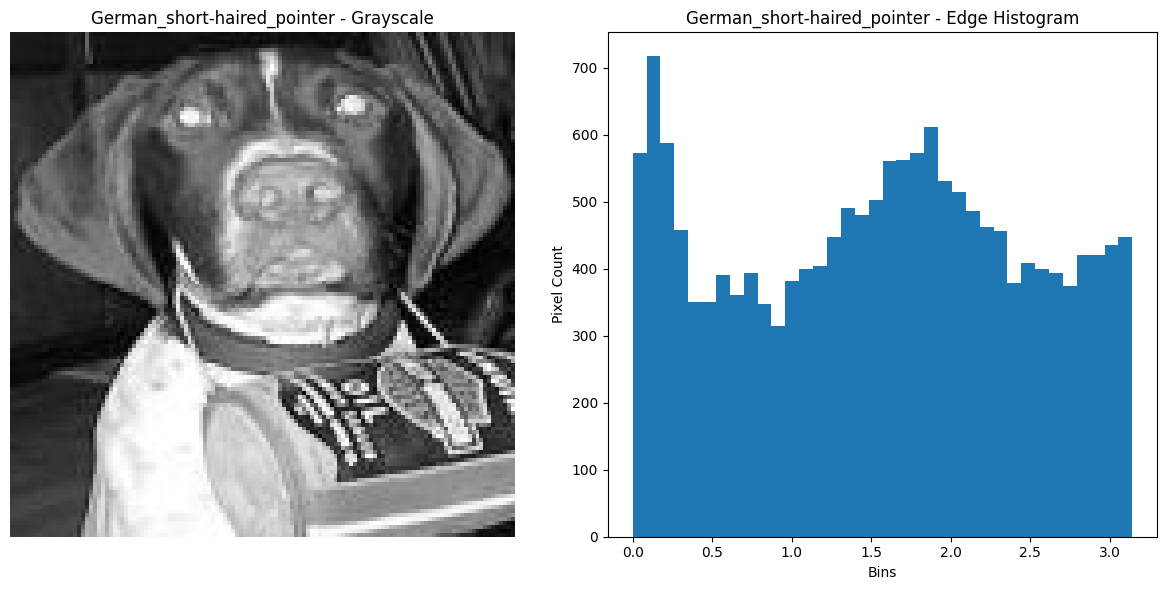

C:/Users/Narendra/Downloads/NDM/cropped\English_foxhound\n02089973_1-0.jpg


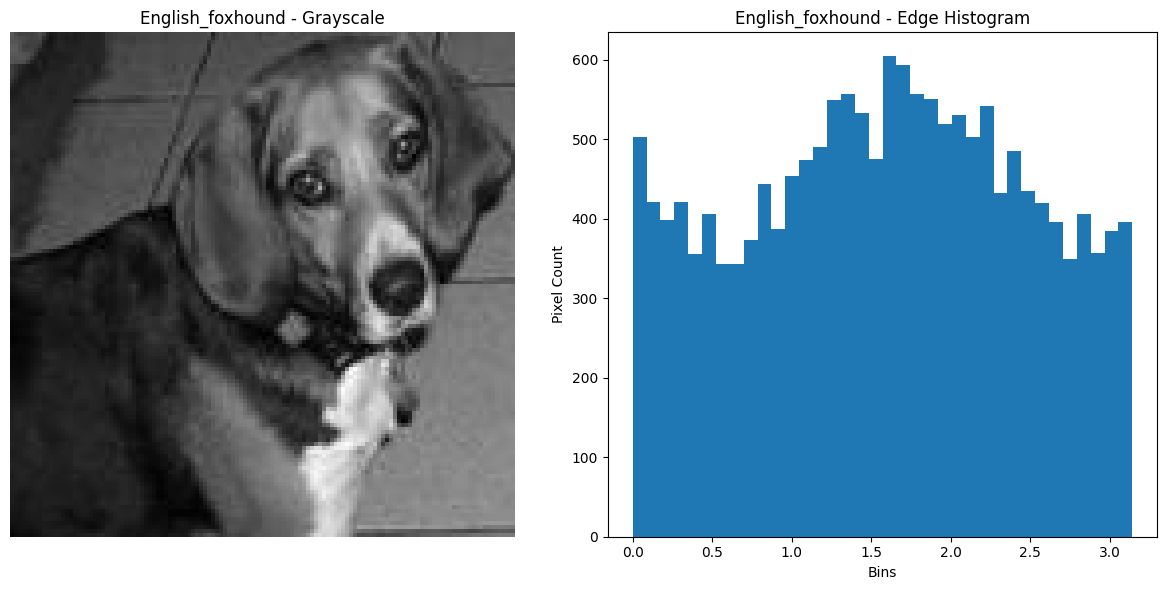

In [9]:
def angle(dx,dy):
    return np.mod(np.arctan2(dy,dx),np.pi)

def one_image_class(image_path):
    image = io.imread(image_path)
    gray_img = color.rgb2gray(image) 

    sobel_h = filters.sobel_h(gray_img) 
    sobel_v = filters.sobel_v(gray_img)
    angle_sobel = angle(sobel_h,sobel_v)

    hist, bin_edges = np.histogram(angle_sobel, bins=36, range=(0, np.pi))

    return gray_img,angle_sobel,hist, bin_edges


class_dog = set(os.path.basename(os.path.dirname(path))for path in cropped)
print(class_dog)

for class_name in class_dog:
    class_image = next(path for path in cropped
                       if os.path.basename(os.path.dirname(path)) == class_name)
    
    gray_img, angle_sobel,hist, bin_edges = one_image_class(class_image)
    print(class_image)
    
    # Plot results
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    
    ax1.imshow(gray_img, cmap='gray')
    ax1.set_title(f'{class_name} - Grayscale')
    ax1.axis('off')
    
    ax2.bar(bin_edges[:-1], hist, width=np.diff(bin_edges), align='edge')
    ax2.set_title(f'{class_name} - Edge Histogram')
    ax2.set_xlabel('Bins')
    ax2.set_ylabel('Pixel Count')
    
    plt.tight_layout()
    plt.show()
    


In [ ]:
# Pick 1 image and compute its HOG descriptors. Visualise the image and the HOG descriptors for the image

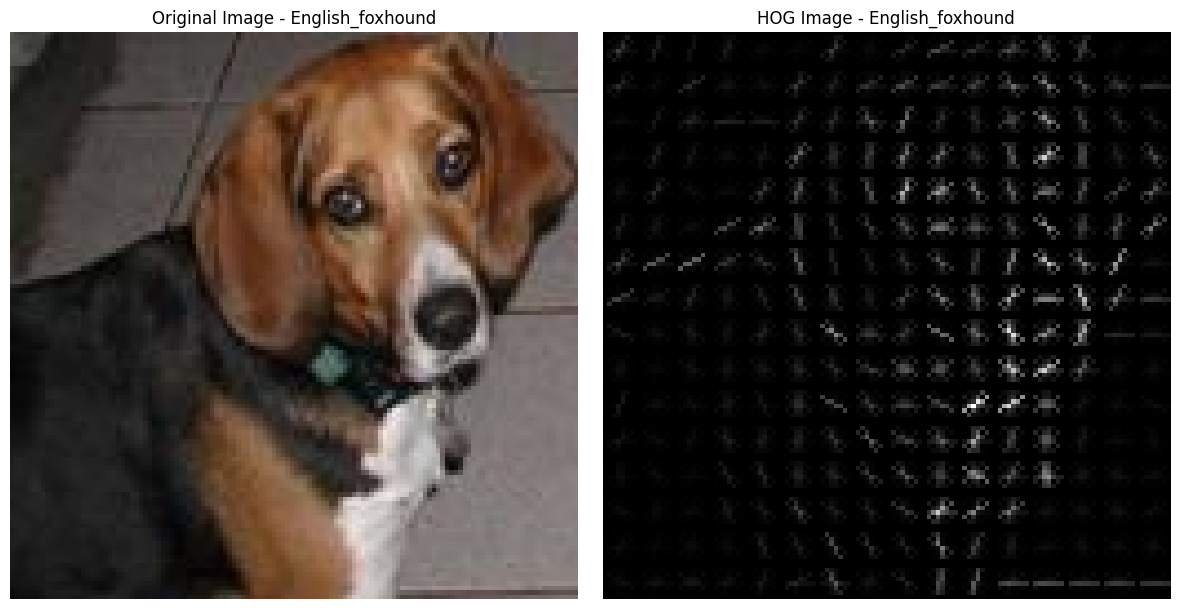

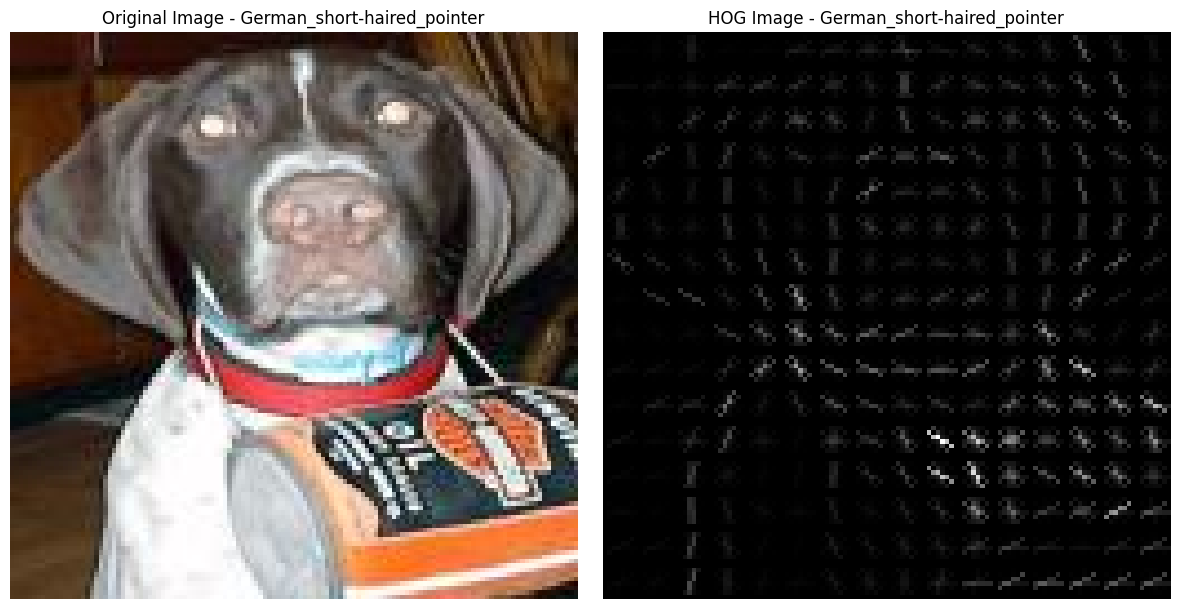

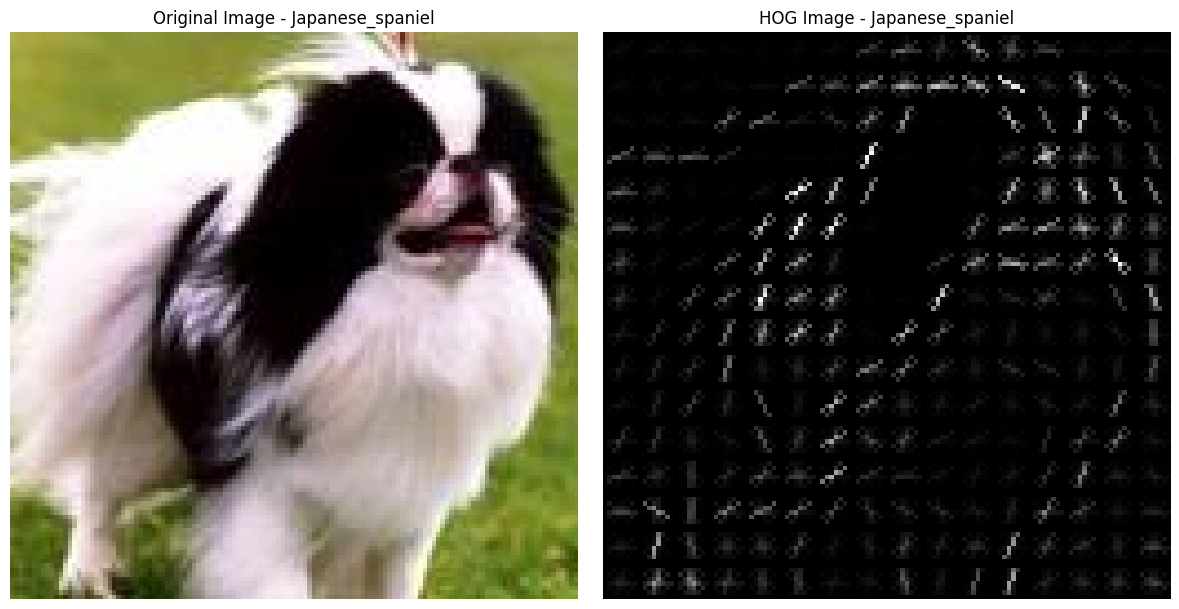

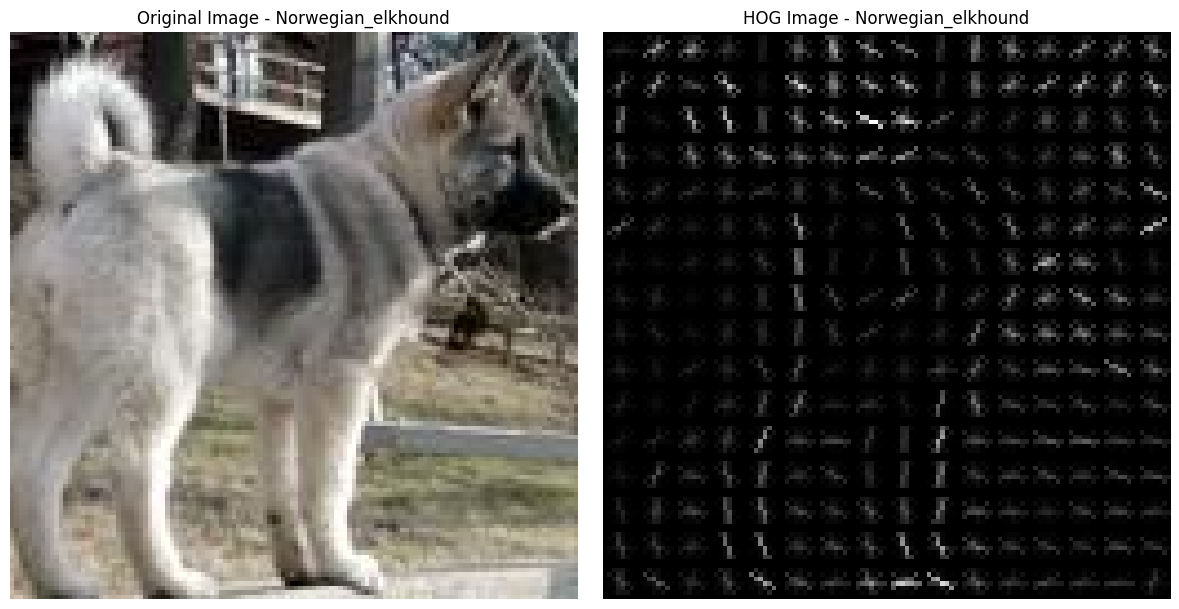

In [19]:
def HOG_descriptor(image_path):
    image = io.imread(image_path)
    gray_img = color.rgb2gray(image)
    fd, hog_image = feature.hog(gray_img, orientations=9, pixels_per_cell=(8, 8),
                                cells_per_block=(2, 2), visualize=True)

    return gray_img, hog_image

# Assuming 'cropped' is a list of image paths
# Create a set of unique dog breeds
class_dog = set(os.path.basename(os.path.dirname(path)) for path in cropped)
unique_breeds = list(class_dog)[:4]  # Get the first four unique breeds

# Loop through the selected breeds and display original and HOG images
for class_name in unique_breeds:
    # Find the first image for each breed
    class_image = next(path for path in cropped if os.path.basename(os.path.dirname(path)) == class_name)

    # Get HOG descriptor for the selected image
    gray_img, hog_image = HOG_descriptor(class_image)

    # Plot the original and HOG images side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    ax1.imshow(io.imread(class_image))
    ax1.set_title(f'Original Image - {class_name}')
    ax1.axis('off')

    ax2.imshow(hog_image, cmap='gray')
    ax2.set_title(f'HOG Image - {class_name}')
    ax2.axis('off')

    plt.tight_layout()
    plt.show()


In [ ]:
# Perform histogram comparison between the 2 edge histograms using the following Euclidean distance– Manhattan distance– Cosine distance

In [10]:
def manhattan_distance(hist_a, hist_b):
    return np.sum(np.abs(hist_a - hist_b))

def euclidean_distance(hist_a, hist_b):
    return np.sqrt(np.sum((hist_a - hist_b) ** 2))

def cosine_similarity(hist_a, hist_b):
    # To avoid division by zero
    norm_a = np.linalg.norm(hist_a)
    norm_b = np.linalg.norm(hist_b)
    if norm_a == 0 or norm_b == 0:
        return 0.0
    return np.dot(hist_a, hist_b) / (norm_a * norm_b)

# Assume 'cropped' is a list of image paths
class_dog = set(os.path.basename(os.path.dirname(path)) for path in cropped)
print(class_dog)

histograms = {}
for class_name in class_dog:
    class_image = next(path for path in cropped if os.path.basename(os.path.dirname(path)) == class_name)

    gray_img, angle_sobel, hist, bin_edges = one_image_class(class_image)
    histograms[class_name] = hist

# Example: Calculate distances/similarity between two classes
class_names = list(class_dog)
if len(class_names) >= 2:
    class_a = class_names[0]
    class_b = class_names[1]
    
    hist_a = histograms[class_a]
    hist_b = histograms[class_b]
    
    manhattan_dist = manhattan_distance(hist_a, hist_b)
    euclidean_dist = euclidean_distance(hist_a, hist_b)
    cosine_sim = cosine_similarity(hist_a, hist_b)
    
    print(f"Distances/Similarity between {class_a} and {class_b}:")
    print(f"Manhattan Distance: {manhattan_dist}")
    print(f"Euclidean Distance: {euclidean_dist}")
    print(f"Cosine Similarity: {cosine_sim}")

{'English_foxhound', 'German_short-haired_pointer', 'Japanese_spaniel', 'Norwegian_elkhound'}
Distances/Similarity between English_foxhound and German_short-haired_pointer:
Manhattan Distance: 2052
Euclidean Distance: 473.550419702063
Cosine Similarity: 0.9854480836841815


In [ ]:
# Perform Principal Component Analysis (PCA) dimensionality reduction on the set of histograms to reduce from 36 to 2 dimensions. (Note: You should not use the class labels)

['English_foxhound', 'German_short-haired_pointer', 'Japanese_spaniel', 'Norwegian_elkhound']


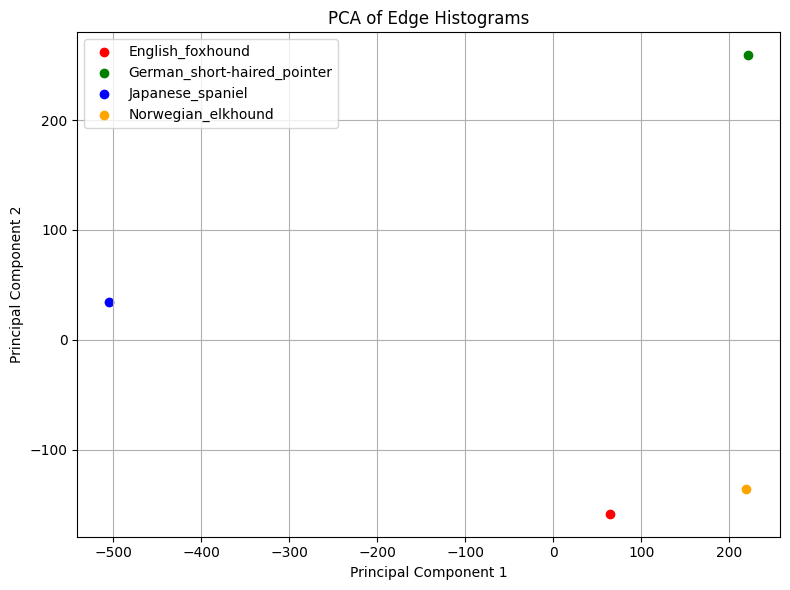

In [11]:
import numpy as np
import os
import matplotlib.pyplot as plt
from skimage import io, color, filters
from sklearn.decomposition import PCA

def angle(dx, dy):
    return np.mod(np.arctan2(dy, dx), np.pi)

def one_image_class(image_path):
    image = io.imread(image_path)
    gray_img = color.rgb2gray(image)

    sobel_h = filters.sobel_h(gray_img)
    sobel_v = filters.sobel_v(gray_img)
    angle_sobel = angle(sobel_h, sobel_v)

    hist, bin_edges = np.histogram(angle_sobel, bins=36, range=(0, np.pi))

    return hist  # Return only the histogram

# Assuming 'cropped' is a list of image paths
class_dog = set(os.path.basename(os.path.dirname(path)) for path in cropped)
class_dog = list(class_dog)  # Convert to list for indexing
print(class_dog)

histograms = []

for class_name in class_dog:
    class_image = next(path for path in cropped
                       if os.path.basename(os.path.dirname(path)) == class_name)
    
    hist = one_image_class(class_image)  # Get only the histogram
    histograms.append(hist)  # Collect histograms

# Perform PCA on the histograms
histograms_array = np.array(histograms)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(histograms_array)

# Plot the PCA results
plt.figure(figsize=(8, 6))
colors = ['red', 'green', 'blue', 'orange'][:len(class_dog)]  # Assign colors
for i, class_name in enumerate(class_dog):
    plt.scatter(pca_result[i, 0], pca_result[i, 1], color=colors[i], label=class_name)

plt.title('PCA of Edge Histograms')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# Plot the 2D points using four different colors for data from the four classes (see Figure 1). How many classes are visually separable (i.e., non-overlapping) ?

Selected dog breeds: ['English_foxhound', 'German_short-haired_pointer', 'Japanese_spaniel', 'Norwegian_elkhound']


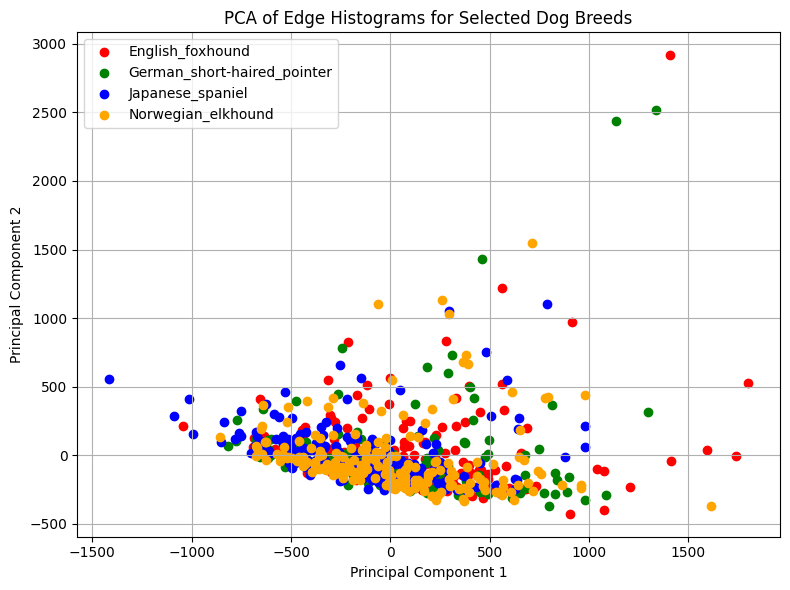

In [12]:
import numpy as np
import os
import matplotlib.pyplot as plt
from skimage import io, color, filters
from sklearn.decomposition import PCA

def angle(dx, dy):
    return np.mod(np.arctan2(dy, dx), np.pi)

def one_image_class(image_path):
    image = io.imread(image_path)
    gray_img = color.rgb2gray(image)

    sobel_h = filters.sobel_h(gray_img)
    sobel_v = filters.sobel_v(gray_img)
    angle_sobel = angle(sobel_h, sobel_v)

    hist, bin_edges = np.histogram(angle_sobel, bins=36, range=(0, np.pi))

    return gray_img, angle_sobel, hist, bin_edges

# Assuming 'cropped' is a list of image paths
class_dog = set(os.path.basename(os.path.dirname(path)) for path in cropped)
class_dog = list(class_dog)[:4]  # Select the first four breeds
print("Selected dog breeds:", class_dog)

# Assign colors to classes (ensure you have enough colors for your classes)
colors = ['red', 'green', 'blue', 'orange'][:len(class_dog)]
histograms = []

# Collect histograms for all images in the selected breeds
for class_name in class_dog:
    class_images = [path for path in cropped if os.path.basename(os.path.dirname(path)) == class_name]
    
    for class_image in class_images:
        _, _, hist, _ = one_image_class(class_image)
        histograms.append(hist)  # Collect histograms

# Perform PCA on the histograms
histograms_array = np.array(histograms)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(histograms_array)

# Plot the PCA results with different colors for each class
plt.figure(figsize=(8, 6))
for i, class_name in enumerate(class_dog):
    # Select indices corresponding to the current class
    class_indices = [j for j, path in enumerate(cropped) if os.path.basename(os.path.dirname(path)) == class_name]
    plt.scatter(pca_result[class_indices, 0], pca_result[class_indices, 1], color=colors[i], label=class_name)

plt.title('PCA of Edge Histograms for Selected Dog Breeds')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()


In [33]:
# From the graph most part of classes are over lapping and we can find English_foxhound and Japanese_spaniel are slightly seperable.

In [13]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import json

def main():
    # Load NDJSON data
    tweets = []
    with open('train (1).json') as f:
        for line in f:
            tweets.append(json.loads(line))

    # Convert to DataFrame
    df = pd.DataFrame(tweets)

    # Ensure there is a 'Tweet' column in the DataFrame
    if 'Tweet' not in df.columns:
        raise ValueError("The JSON data must contain a 'Tweet' field.")

    # Token counts using CountVectorizer
    count_vectorizer = CountVectorizer()
    token_counts = count_vectorizer.fit_transform(df['Tweet'])

    # Get the dimensionality of the token counts
    token_counts_dimensionality = token_counts.shape[1]
    print(f"Dimensionality of token counts: {token_counts_dimensionality}")

    # TF-IDF feature counts using TfidfVectorizer
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_counts = tfidf_vectorizer.fit_transform(df['Tweet'])

    # Get the dimensionality of the TF-IDF feature counts
    tfidf_counts_dimensionality = tfidf_counts.shape[1]
    print(f"Dimensionality of TF-IDF feature counts: {tfidf_counts_dimensionality}")

if __name__ == "__main__":
    main()


Dimensionality of token counts: 9521
Dimensionality of TF-IDF feature counts: 9521


In [ ]:
# Perform dimensionality reduction similar to 2(d) with dimensionality reduced to 2

In [15]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import json

def main():
    # Load NDJSON data
    tweets = []
    with open('train (1).json') as f:
        for line in f:
            tweets.append(json.loads(line))

    # Convert to DataFrame
    df = pd.DataFrame(tweets)

    # Ensure there is a 'Tweet' column in the DataFrame
    if 'Tweet' not in df.columns:
        raise ValueError("The JSON data must contain a 'Tweet' field.")

    # Define the four classes based on emotions
    classes_of_interest = ['anger', 'disgust', 'sadness', 'surprise']

    # Filter the DataFrame for the selected classes
    filtered_df = df[
        (df['anger'] | df['disgust'] | df['sadness'] | df['surprise'])
    ]

    # Check for the presence of each class
    for cls in classes_of_interest:
        if filtered_df[filtered_df[cls]].empty:
            print(f"No data for class: {cls}")

    # Token counts using CountVectorizer
    count_vectorizer = CountVectorizer()
    token_counts = count_vectorizer.fit_transform(filtered_df['Tweet'])

    # Get the dimensionality of the token counts
    token_counts_dimensionality = token_counts.shape[1]
    print(f"Dimensionality of token counts: {token_counts_dimensionality}")

    # TF-IDF feature counts using TfidfVectorizer
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_counts = tfidf_vectorizer.fit_transform(filtered_df['Tweet'])

    # Get the dimensionality of the TF-IDF feature counts
    tfidf_counts_dimensionality = tfidf_counts.shape[1]
    print(f"Dimensionality of TF-IDF feature counts: {tfidf_counts_dimensionality}")

if __name__ == "__main__":
    main()


Dimensionality of token counts: 6539
Dimensionality of TF-IDF feature counts: 6539


In [ ]:
# Plot the 2D points using four different colors for data from the four classes (see Figure 1) for both token count features and tf-idf features in two separate plots. (2 points)


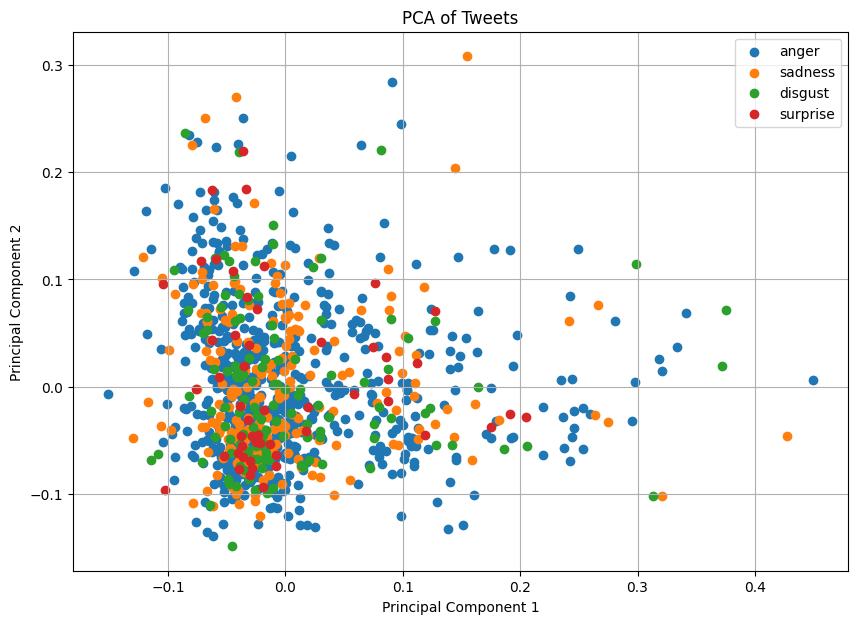

In [16]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import json
import matplotlib.pyplot as plt

def main():
    # Load NDJSON data
    tweets = []
    with open('train (1).json') as f:
        for line in f:
            tweets.append(json.loads(line))

    # Convert to DataFrame
    df = pd.DataFrame(tweets)

    # Ensure there is a 'Tweet' column in the DataFrame
    if 'Tweet' not in df.columns:
        raise ValueError("The JSON data must contain a 'Tweet' field.")

    # Define the four classes based on emotions
    classes_of_interest = ['anger', 'disgust', 'sadness', 'surprise']

    # Filter the DataFrame for the selected classes
    filtered_df = df[
        df[classes_of_interest].any(axis=1)
    ]

    # Token counts using TfidfVectorizer
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_counts = tfidf_vectorizer.fit_transform(filtered_df['Tweet'])

    # Dimensionality reduction using PCA
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(tfidf_counts.toarray())

    # Create a DataFrame for the PCA results
    pca_df = pd.DataFrame(reduced_data, columns=['PC1', 'PC2'])
    
    # Add the class labels to the PCA DataFrame
    pca_df['Class'] = filtered_df[classes_of_interest].idxmax(axis=1)

    # Remove rows with NaN values in the 'Class' column
    pca_df = pca_df.dropna(subset=['Class'])

    # Plotting the results
    plt.figure(figsize=(10, 7))
    for cls in pca_df['Class'].unique():
        subset = pca_df[pca_df['Class'] == cls]
        plt.scatter(subset['PC1'], subset['PC2'], label=cls)

    plt.title('PCA of Tweets')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.grid()
    plt.show()

if __name__ == "__main__":
    main()


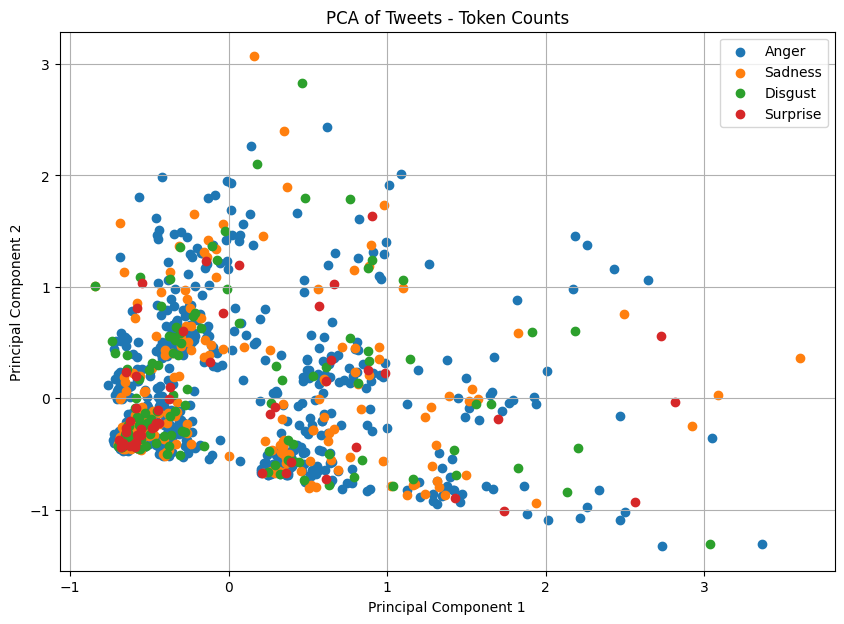

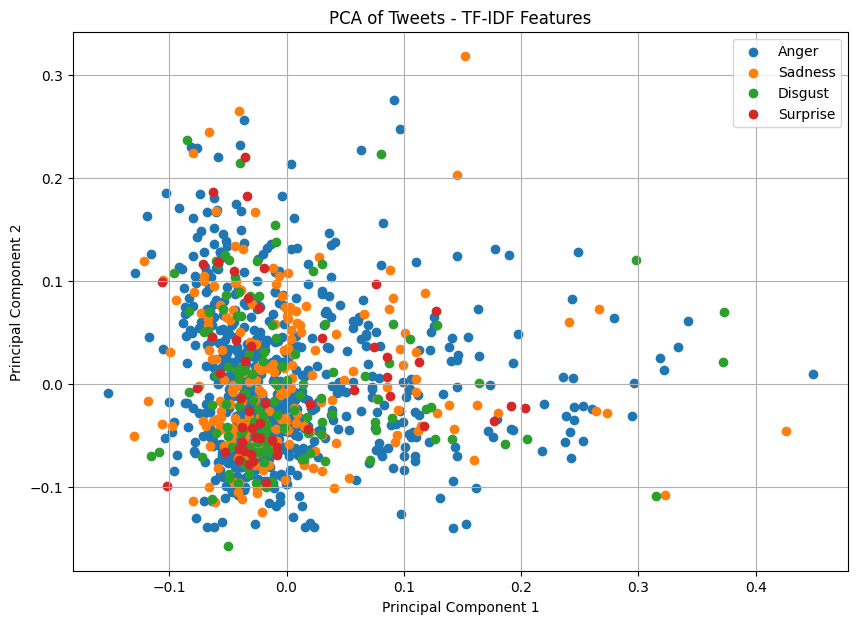

In [17]:
def assign_class(row):
    if row['anger']:
        return 'Anger'
    elif row['disgust']:
        return 'Disgust'
    elif row['sadness']:
        return 'Sadness'
    elif row['surprise']:
        return 'Surprise'
    return 'Neutral'

def main():
    # Load NDJSON data
    tweets = []
    with open('train (1).json') as f:
        for line in f:
            tweets.append(json.loads(line))

    # Convert to DataFrame
    df = pd.DataFrame(tweets)

    # Ensure required columns exist
    required_columns = ['Tweet', 'anger', 'disgust', 'sadness', 'surprise']
    if not all(col in df.columns for col in required_columns):
        raise ValueError("The JSON data must contain 'Tweet', 'anger', 'disgust', 'sadness', and 'surprise' fields.")

    # Define classes based on emotional attributes
    classes_of_interest = ['anger', 'disgust', 'sadness', 'surprise']

    # Filter for tweets with at least one emotional attribute true
    filtered_df = df[(df['anger'] | df['disgust'] | df['sadness'] | df['surprise'])]

    # Token counts using CountVectorizer
    count_vectorizer = CountVectorizer()
    count_counts = count_vectorizer.fit_transform(filtered_df['Tweet'])

    # Dimensionality reduction using PCA for token counts
    pca_count = PCA(n_components=2)
    reduced_count_data = pca_count.fit_transform(count_counts.toarray())

    # Create a DataFrame for the PCA results
    pca_count_df = pd.DataFrame(reduced_count_data, columns=['PC1', 'PC2'])
    
    # Assign class labels based on emotional attributes for token counts
    pca_count_df['Class'] = filtered_df[classes_of_interest].apply(assign_class, axis=1)

    # Remove rows with NaN values in the 'Class' column
    pca_count_df = pca_count_df.dropna(subset=['Class'])

    # Plotting the PCA for Token Counts
    plt.figure(figsize=(10, 7))
    for cls in pca_count_df['Class'].unique():
        subset = pca_count_df[pca_count_df['Class'] == cls]
        plt.scatter(subset['PC1'], subset['PC2'], label=cls)

    plt.title('PCA of Tweets - Token Counts')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.grid()
    plt.show()  # Ensure this is called

    # Token counts using TfidfVectorizer
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_counts = tfidf_vectorizer.fit_transform(filtered_df['Tweet'])

    # Dimensionality reduction using PCA for TF-IDF features
    pca_tfidf = PCA(n_components=2)
    reduced_tfidf_data = pca_tfidf.fit_transform(tfidf_counts.toarray())

    # Create a DataFrame for the PCA results
    pca_tfidf_df = pd.DataFrame(reduced_tfidf_data, columns=['PC1', 'PC2'])
    
    # Assign class labels based on emotional attributes for TF-IDF features
    pca_tfidf_df['Class'] = filtered_df[classes_of_interest].apply(assign_class, axis=1)

    # Remove rows with NaN values in the 'Class' column
    pca_tfidf_df = pca_tfidf_df.dropna(subset=['Class'])

    # Plotting the PCA for TF-IDF Features
    plt.figure(figsize=(10, 7))
    for cls in pca_tfidf_df['Class'].unique():
        subset = pca_tfidf_df[pca_tfidf_df['Class'] == cls]
        plt.scatter(subset['PC1'], subset['PC2'], label=cls)

    plt.title('PCA of Tweets - TF-IDF Features')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.grid()
    plt.show()  # Ensure this is called

if __name__ == "__main__":
    main()


In [ ]:
# How many classes are visually separable (i.e., non-overlapping) for both plots? 
# Anger and Suprise are visually sperable 


Classes found: {'English_foxhound', 'German_short-haired_pointer', 'Japanese_spaniel', 'Norwegian_elkhound'}


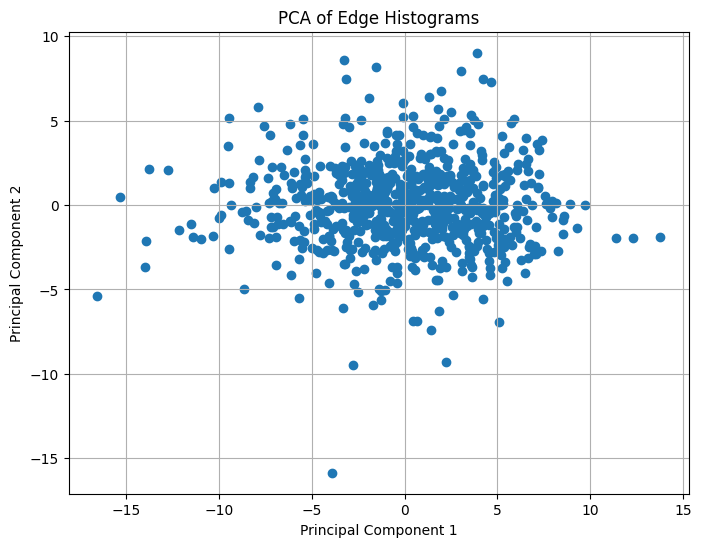

In [20]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, filters
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def angle(dx, dy):
    return np.mod(np.arctan2(dy, dx), np.pi)

def one_image_class(image_path):
    image = io.imread(image_path)
    gray_img = color.rgb2gray(image) 

    # Compute Sobel gradients
    sobel_h = filters.sobel_h(gray_img) 
    sobel_v = filters.sobel_v(gray_img)
    angle_sobel = angle(sobel_h, sobel_v)

    # Create histogram of angles
    hist, _ = np.histogram(angle_sobel, bins=36, range=(0, np.pi))
    
    return hist

# Assuming 'cropped' is a list of paths to the images
class_dog = set(os.path.basename(os.path.dirname(path)) for path in cropped)
print("Classes found:", class_dog)

# Collect histograms from all images
histograms = []

for class_name in class_dog:
    class_images = [path for path in cropped if os.path.basename(os.path.dirname(path)) == class_name]
    
    for class_image in class_images:
        hist = one_image_class(class_image)
        histograms.append(hist)

# Convert list of histograms to a NumPy array
X = np.array(histograms)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the PCA results
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.title('PCA of Edge Histograms')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()


In [ ]:
# Convert all the images from the four classes to edge histograms.


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, filters

def angle(dx, dy):
    return np.mod(np.arctan2(dy, dx), np.pi)

def one_image_class(image_path):
    image = io.imread(image_path)
    gray_img = color.rgb2gray(image) 

    # Compute Sobel gradients
    sobel_h = filters.sobel_h(gray_img) 
    sobel_v = filters.sobel_v(gray_img)
    angle_sobel = angle(sobel_h, sobel_v)

    # Create histogram of angles
    hist, bin_edges = np.histogram(angle_sobel, bins=36, range=(0, np.pi))

    return gray_img, angle_sobel, hist, bin_edges

# Assuming 'cropped' is a list of paths to the images
class_dog = set(os.path.basename(os.path.dirname(path)) for path in cropped)
print("Classes found:", class_dog)

# Iterate over each class and process the images
for class_name in class_dog:
    # Get all images for the current class
    class_images = [path for path in cropped if os.path.basename(os.path.dirname(path)) == class_name]
    
    for class_image in class_images:
        gray_img, angle_sobel, hist, bin_edges = one_image_class(class_image)
        print(f'Processing image: {class_image}')
        
        # Plot results
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

        ax1.imshow(gray_img, cmap='gray')
        ax1.set_title(f'{class_name} - Grayscale')
        ax1.axis('off')

        ax2.bar(bin_edges[:-1], hist, width=np.diff(bin_edges), align='edge')
        ax2.set_title(f'{class_name} - Edge Histogram')
        ax2.set_xlabel('Angle (radians)')
        ax2.set_ylabel('Pixel Count')

        plt.tight_layout()
        plt.show()
